# <strong>R 데이터 분석 (데이터 전처리)
<strong>쉽게 배우는 R 데이터 분석

http://www.devtimes.com/194  (R 단축키)
<br><br>
## <strong>1 결측 데이터 정제
결측치 정제하기

In [1]:
df <- data.frame(sex = c("M", "F", NA, "M", "F"),
                 score = c(5, 4, 3, 4, NA)); df

is.na(df)               # 결측치 확인
table(is.na(df))        # 결측치 빈도 출력
table(is.na(df$sex))    # sex 결측치 빈도 출력
table(is.na(df$score))  # score 결측치 빈도 출력
mean(df$score)          # 평균 산출
sum(df$score)           # 합계 산출 (NA가 중간에 있으면 연산이 불가능 하다)

sex,score
M,5
F,4
NA,3
M,4
F,NA


sex,score
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE
FALSE,FALSE
FALSE,TRUE



FALSE  TRUE 
    8     2 


FALSE  TRUE 
    4     1 


FALSE  TRUE 
    4     1 

[1] NA

[1] NA

In [2]:
library(dplyr)                              # dplyr 패키지 로드
df %>% filter(is.na(score))                 # score가 NA인 데이터만 출력
df %>% filter(!is.na(score))                # score 결측치 제거


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



sex,score
F,NA


sex,score
M,5
F,4
NA,3
M,4


In [3]:
df_nomiss <- df %>% filter(!is.na(score))  # score 결측치 제거
mean(df_nomiss$score)                      # 결측치 제거 후 평균을 산출
sum(df_nomiss$score)                       # 결측치 제거 후 합계 산출

[1] 4

[1] 16

In [4]:
df_nomiss <- df %>% 
             filter(!is.na(score) & !is.na(sex)) ; df_nomiss  # score, sex 컬럼의 결측치 제거 후 출력
df_nomiss2 <- na.omit(df) ; df_nomiss2                        # 모든 변수(컬럼)에 결측치 없는 데이터를 추출
mean(df$score, na.rm = T)  # 결측치 제외하고 평균 산출
sum(df$score, na.rm = T)   # 결측치 제외하고 합계 산출


sex,score
M,5
F,4
M,4


,sex,score
1,M,5
2,F,4
4,M,4


[1] 4

[1] 16

In [5]:
getwd()
setwd('/home/markbaum/Python/Source/R/data'); getwd()  # 작업 폴더의 변경
exam <- read.csv('csv_exam.csv')                       # CSV 파일 불러오기
exam[c(3, 8, 15), "math"] <- NA  ; head(exam,3)        # 3, 8, 15행 math에 NA를 할당

[1] "/home/markbaum/Python/Source/R"

[1] "/home/markbaum/Python/Source/R/data"

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,NA,86,78


In [6]:
exam %>% summarise(mean_math = mean(math))                 # math 평균 산출
exam %>% summarise(mean_math = mean(math, na.rm = T))      # math 결측치 제외하고 평균 산출
exam %>% summarise(mean_math = mean(math, na.rm = T),      # 평균 산출
                   sum_math = sum(math, na.rm = T),        # 합계 산출
                   median_math = median(math, na.rm = T))  # 중앙값 산출
math_mid <- mean(exam$math, na.rm = T) ; math_mid          # 결측치 제거 후 math 평균을 산출

mean_math
NA


mean_math
55.23529


mean_math,sum_math,median_math
55.23529,939,50


[1] 55.23529

In [7]:
exam$math <- ifelse(is.na(exam$math), math_mid, exam$math)  # math컬럼의 NA를 55(평균값)로 대체
table(is.na(exam$math))                                     # 결측치 빈도표 생성
mean(exam$math)                                             # math 평균 산출 (NA제외한 평균과 동일한 결과를 출력)


FALSE 
   20 

[1] 55.23529

<br>
## <strong>2 이상치 데이터 정제
이상치 정제하기

In [8]:
outlier <- data.frame(sex   = c(1, 2, 1, 3, 2, 1),
                      score = c(5, 4, 3, 4, 2, 6)); head(outlier,3)
table(outlier$sex)
table(outlier$score)

sex,score
1,5
2,4
1,3



1 2 3 
3 2 1 


2 3 4 5 6 
1 1 2 1 1 

In [9]:
outlier$sex <- ifelse(outlier$sex == 3, NA, outlier$sex);      head(outlier, 3) # sex가 3일 떄, NA 할당
outlier$score <- ifelse(outlier$score > 5, NA, outlier$score); head(outlier, 3) # score가 5보다 크면 NA 할당
outlier %>% 
      filter(!is.na(sex) & !is.na(score)) %>%
      group_by(sex) %>%
      summarise(mean_score = mean(score))

sex,score
1,5
2,4
1,3


sex,score
1,5
2,4
1,3


sex,mean_score
1,4
2,3


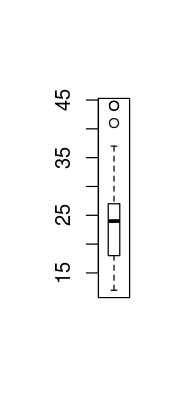

In [10]:
library(repr)                # ggplot 의 출력 크기를 정의
options(repr.plot.width = 1.5, repr.plot.height = 3.5)  
mpg <- as.data.frame(ggplot2::mpg)
boxplot(mpg$hwy)

[,1]
[1,]   12
[2,]   18
[3,]   24
[4,]   27
[5,]   37
attr(,"class")
        1 
"integer"

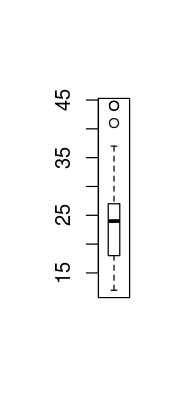

In [11]:
boxplot(mpg$hwy)$stats  # 상자 그림 통계치 출력

In [12]:
mpg$hwy <- ifelse(mpg$hwy < 12 | mpg$hwy > 37, NA, mpg$hwy)  # 12~37 벗어나면 NA 할당
table(is.na(mpg$hwy))                                         # 결측치 확인
mpg %>% group_by(drv) %>% summarise(mean_hwy = mean(hwy, na.rm = T))


FALSE  TRUE 
  231     3 

drv,mean_hwy
4,19.17476
f,27.72816
r,21.00000


<br>
## <strong>3 데이터 정제 정리 및 요약
정제방법의 요약

In [13]:
# 1.결측치 정제
table(is.na(df$score))                                   # 결측치 확인

df_nomiss <- df %>% filter(!is.na(score))                # 결측치 제거
df_nomiss <- df %>% filter(!is.na(score) & !is.na(sex))  # 여러 변수 동시에 결측치 제거
mean(df$score, na.rm = T) 

exam %>% summarise(mean_math = mean(math, na.rm = T))    # 함수의 결측치 제외 후 평균출력


FALSE  TRUE 
    4     1 

[1] 4

mean_math
55.23529



1 2 
3 2 

[,1]
[1,]   12
[2,]   18
[3,]   24
[4,]   27
[5,]   37
attr(,"class")
        1 
"integer"

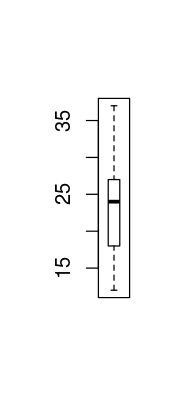

In [14]:
# 2.이상치 정제
table(outlier$sex)                                         # 이상치 확인

outlier$sex <- ifelse(outlier$sex == 3, NA, outlier$sex)  # 결측 처리
boxplot(mpg$hwy)$stats                                    # boxplot으로 극단치 기준 찾기

In [15]:
mpg$hwy <- ifelse(mpg$hwy < 12 | mpg$hwy > 37, NA, mpg$hwy) # 극단치 결측 처리